<h1 style="color:blue;" style="font-family:georgia;"><i><b>CSE6060</b></i></h1>
<h1 style="color:blue;" style="font-family:georgia;"><i>Statistical Natural Language Processing</i></h1>

<h2>Embedding and Chunking</h2>
<h3>Name : Kavianand G</h3>
<h3>Reg. No. : 19MAI0050</h3>
<h3>Date : 27 – June – 2020</h3>


<h1 style="color:red;" style="font-family:georgia;"><i> Embedding</i></h1>

        Embeddings translate large sparse vectors into a lower-dimensional space that preserves semantic relationships.
        
        Word embeddings is a technique where individual words of a domain or language are represented as real-valued vectors in a lower dimensional space.
       
       The idea behind all of the word embeddings is to capture with them as much of the semantical/morphological/context/hierarchical/etc, information as possible.

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import gensim
from gensim.models import Word2Vec 

In [2]:
sample = open("C:/Users/KaviananD/Desktop/dataset/alice_in_wonderland.txt", "r") 
s = sample.read() 

In [3]:
# Replaces escape character with space 
f = s.replace("\n", " ") 

In [4]:
data = [] 
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp) 

In [5]:
print(data)

[['project', 'gutenberg', "'s", 'alice', "'s", 'adventures', 'in', 'wonderland', ',', 'by', 'lewis', 'carroll', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.'], ['you', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www.gutenberg.org', 'title', ':', 'alice', "'s", 'adventures', 'in', 'wonderland', 'author', ':', 'lewis', 'carroll', 'posting', 'date', ':', 'june', '25', ',', '2008', '[', 'ebook', '#', '11', ']', 'release', 'date', ':', 'march', ',', '1994', '[', 'last', 'updated', ':', 'december', '20', ',', '2011', ']', 'language', ':', 'english', 'character', 'set', 'encoding', ':', 'ascii', '*', '*', '*', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'alice', "'s", 'adventures', 'in', 'wonderland', '*', '*', '*',

In [6]:
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5) 

#### CBOW (Continuous Bag of Words) 
            CBOW model predicts the current word given context words within specific window. The input layer contains the context words and the output layer contains the current word. The hidden layer contains the number of dimensions in which we want to represent current word present at the output layer.

In [7]:
# Print results 
print("Cosine similarity between 'alice' " + 
               "and 'wonderland' - CBOW : ", 
    model1.similarity('alice', 'wonderland')) 
      
print("Cosine similarity between 'alice' " +
                 "and 'machines' - CBOW : ", 
      model1.similarity('alice', 'machines')) 

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.9885167
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9455283


C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


#### Skip Gram 
        Skip gram predicts the surrounding context words within specific window given current word. The input layer contains the current word and the output layer contains the context words. The hidden layer contains the number of dimensions in which we want to represent current word present at the input layer.

In [8]:
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 
  
# Print results 
print("Cosine similarity between 'alice' " +
          "and 'wonderland' - Skip Gram : ", 
    model2.similarity('alice', 'wonderland')) 
      
print("Cosine similarity between 'alice' " +
            "and 'machines' - Skip Gram : ", 
      model2.similarity('alice', 'machines')) 

Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.7046855
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.8984479


C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if sys.path[0] == '':


In [9]:
import nltk

In [10]:
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())

In [11]:
model.save('model_brown_embedding')
model_3 = gensim.models.Word2Vec.load('model_brown_embedding')

In [12]:
len(model['universities'])

C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


100

In [13]:
model_3.similarity('university','school') > 0.3

C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


True

In [14]:
model.similarity('university','school') > 0.3

C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


True

In [15]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\KaviananD\AppData\Roaming\nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

In [16]:
model.similarity('woman','man')

C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.87781733

In [17]:
model.doesnt_match('breakfast cereal dinner lunch'.split())


C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

In [18]:
model.most_similar(positive=['woman','king'],negative=['man'],topn=1)

C:\Users\KaviananD\Anaconda3\envs\tf_gpu_new\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sold', 0.9440714120864868)]

In [19]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [20]:
import numpy as np
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(model['university'])))

In [21]:
for term in model.vocab:
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

In [22]:
# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)


In [23]:
# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

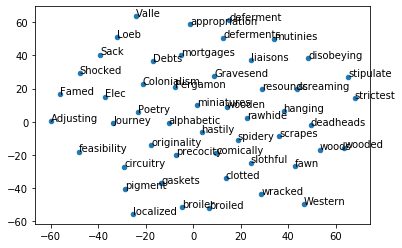

In [24]:
# Show the scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)
#Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()


<h1 style="color:red;" style="font-family:georgia;"><i> Chunking</i></h1>

        Parts of speech Tagging is responsible for reading the text in a language and assigning some specific token (Parts of Speech) to each word.

        Chunking is used to add more structure to the sentence by following parts of speech (POS) tagging. 
   
        It is also known as shallow parsing. The resulted group of words is called "chunks." 

        The primary usage of chunking is to make a group of "noun phrases." The parts of speech are combined with regular expressions.

In [25]:
import nltk
#nltk.download('tagsets')

In [26]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]
 
grammar = "NP : {<DT>?<JJ>*<NN>}"

In [27]:
cp = nltk.RegexpParser(grammar)

In [28]:
result = cp.parse(sentence)

In [29]:
print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [30]:
result.draw()

In [31]:
text = "I am happy to write this letter of recommendation for AAA who intends to pursue a Master's degree at your prestigious university. I have known him only for the past year and it was easy to observe that he is a quick learner and hardworking. I handled the course Natural Language Processing for him during his sixth semester.".split()

In [32]:
lor_res = cp.parse(nltk.pos_tag(text))

In [33]:
print(nltk.pos_tag(text))

[('I', 'PRP'), ('am', 'VBP'), ('happy', 'JJ'), ('to', 'TO'), ('write', 'VB'), ('this', 'DT'), ('letter', 'NN'), ('of', 'IN'), ('recommendation', 'NN'), ('for', 'IN'), ('AAA', 'NNP'), ('who', 'WP'), ('intends', 'VBZ'), ('to', 'TO'), ('pursue', 'VB'), ('a', 'DT'), ("Master's", 'NNP'), ('degree', 'NN'), ('at', 'IN'), ('your', 'PRP$'), ('prestigious', 'JJ'), ('university.', 'NN'), ('I', 'PRP'), ('have', 'VBP'), ('known', 'VBN'), ('him', 'PRP'), ('only', 'RB'), ('for', 'IN'), ('the', 'DT'), ('past', 'JJ'), ('year', 'NN'), ('and', 'CC'), ('it', 'PRP'), ('was', 'VBD'), ('easy', 'JJ'), ('to', 'TO'), ('observe', 'VB'), ('that', 'IN'), ('he', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('quick', 'JJ'), ('learner', 'NN'), ('and', 'CC'), ('hardworking.', 'NN'), ('I', 'PRP'), ('handled', 'VBD'), ('the', 'DT'), ('course', 'NN'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP'), ('for', 'IN'), ('him', 'PRP'), ('during', 'IN'), ('his', 'PRP$'), ('sixth', 'JJ'), ('semester.', 'NN')]


In [34]:
print(lor_res)

(S
  I/PRP
  am/VBP
  happy/JJ
  to/TO
  write/VB
  (NP this/DT letter/NN)
  of/IN
  (NP recommendation/NN)
  for/IN
  AAA/NNP
  who/WP
  intends/VBZ
  to/TO
  pursue/VB
  a/DT
  Master's/NNP
  (NP degree/NN)
  at/IN
  your/PRP$
  (NP prestigious/JJ university./NN)
  I/PRP
  have/VBP
  known/VBN
  him/PRP
  only/RB
  for/IN
  (NP the/DT past/JJ year/NN)
  and/CC
  it/PRP
  was/VBD
  easy/JJ
  to/TO
  observe/VB
  that/IN
  he/PRP
  is/VBZ
  (NP a/DT quick/JJ learner/NN)
  and/CC
  (NP hardworking./NN)
  I/PRP
  handled/VBD
  (NP the/DT course/NN)
  Natural/NNP
  Language/NNP
  Processing/NNP
  for/IN
  him/PRP
  during/IN
  his/PRP$
  (NP sixth/JJ semester./NN))


In [35]:
lor_res.draw()

In [36]:
nltk.help.upenn_tagset("NN")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [37]:
import nltk
from nltk import pos_tag
from nltk import RegexpParser
text ="Chunking is used to add more structure to the sentence by following parts of speech (POS) tagging."
tokens = nltk.word_tokenize(text)
print("\nAfter Split:",tokens)
tokens_tag = pos_tag(tokens)
print("\nAfter Token:",tokens_tag)
patterns= """NP:{<NN.?>*<VBD.?>*<JJ.?>*<CC>?}"""
chunker = RegexpParser(patterns)
print("\nAfter Regex:",chunker)
output = chunker.parse(tokens_tag)
print("\nAfter Chunking",output)


After Split: ['Chunking', 'is', 'used', 'to', 'add', 'more', 'structure', 'to', 'the', 'sentence', 'by', 'following', 'parts', 'of', 'speech', '(', 'POS', ')', 'tagging', '.']

After Token: [('Chunking', 'NN'), ('is', 'VBZ'), ('used', 'VBN'), ('to', 'TO'), ('add', 'VB'), ('more', 'JJR'), ('structure', 'NN'), ('to', 'TO'), ('the', 'DT'), ('sentence', 'NN'), ('by', 'IN'), ('following', 'VBG'), ('parts', 'NNS'), ('of', 'IN'), ('speech', 'NN'), ('(', '('), ('POS', 'NNP'), (')', ')'), ('tagging', 'NN'), ('.', '.')]

After Regex: chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NN.?>*<VBD.?>*<JJ.?>*<CC>?'>

After Chunking (S
  (NP Chunking/NN)
  is/VBZ
  used/VBN
  to/TO
  add/VB
  (NP more/JJR)
  (NP structure/NN)
  to/TO
  the/DT
  (NP sentence/NN)
  by/IN
  following/VBG
  (NP parts/NNS)
  of/IN
  (NP speech/NN)
  (/(
  (NP POS/NNP)
  )/)
  (NP tagging/NN)
  ./.)


In [38]:
output.draw() 